# COGNORISE INFOTECH_ TASK 1_ UNEMPLOYEMENT IN INDIA 

OBJECTIVE:

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. During the Covid-19 period there was a sharp increase in the unemployment rate. So in this assignment we have to analyze the unemployment rate using Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [33]:
data_set = r"D:\CognoRise Infotech\Unemployment_Rate_upto_11_2020.csv"

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(data_set)
    
    # Now you can work with the DataFrame (df) as needed
    print(df.head())
    
except FileNotFoundError:
    print(f"File not found at the specified path: {file_path}")

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
#updating the column names

df.columns=["State","Date","Frequency","Estimated unemployment rate","Estimated employed","Estimated labour participation rate","Region","Longitude","Latitude"]

In [5]:
df.head()


,State,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
df.shape

(267, 9)

In [7]:
df.columns


Index(['State', 'Date', 'Frequency', 'Estimated unemployment rate',
       'Estimated employed', 'Estimated labour participation rate', 'Region',
       'Longitude', 'Latitude'],
      dtype='object')

In [8]:
df.describe()


,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [9]:
df= df.drop_duplicates()     #removing duplicates
df.shape

(267, 9)

In [10]:
df.dtypes

State                                   object
Date                                    object
Frequency                               object
Estimated unemployment rate            float64
Estimated employed                       int64
Estimated labour participation rate    float64
Region                                  object
Longitude                              float64
Latitude                               float64
dtype: object

In [11]:
df["Date"]=pd.to_datetime(df["Date"])

In [12]:
df.dtypes

State                                          object
Date                                   datetime64[ns]
Frequency                                      object
Estimated unemployment rate                   float64
Estimated employed                              int64
Estimated labour participation rate           float64
Region                                         object
Longitude                                     float64
Latitude                                      float64
dtype: object

In [13]:
df.isnull().sum()

State                                  0
Date                                   0
Frequency                              0
Estimated unemployment rate            0
Estimated employed                     0
Estimated labour participation rate    0
Region                                 0
Longitude                              0
Latitude                               0
dtype: int64

In [14]:
df.duplicated().any()

False

In [15]:
#Converting 'Frequency' and 'Region' columns to categorical data type

df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

In [16]:
df.dtypes

State                                          object
Date                                   datetime64[ns]
Frequency                                    category
Estimated unemployment rate                   float64
Estimated employed                              int64
Estimated labour participation rate           float64
Region                                       category
Longitude                                     float64
Latitude                                      float64
dtype: object

In [17]:
#extract month

df["month"]=df["Date"].dt.month

#converting 'month' to integer format

df['Month_int'] = df['month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names

df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [18]:
df.tail()

,State,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Region,Longitude,Latitude,month,Month_int,Month_name
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,6,6,Jun
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,7,7,Jul
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,8,8,Aug
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,9,9,Sep
266,West Bengal,2020-10-31,M,9.98,33962549,45.63,East,22.9868,87.855,10,10,Oct


## Exploratory Data Analysis

In [19]:
df['Region'].value_counts()

North        79
South        60
West         50
East         40
Northeast    38
Name: Region, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'East'),
  Text(1, 0, 'North'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'South'),
  Text(4, 0, 'West')])

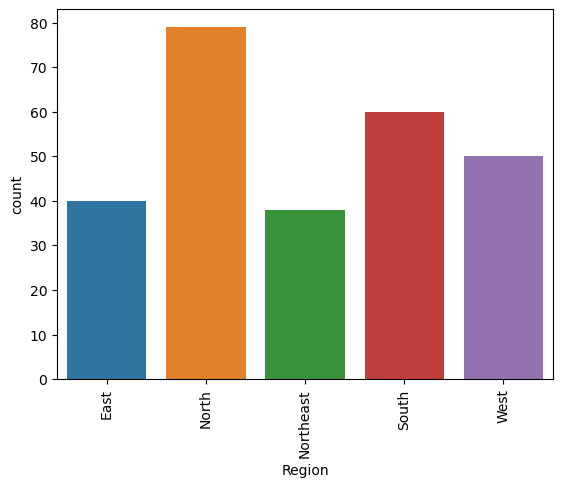

In [20]:
sns.countplot(x=df['Region'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Region', ylabel='count'>

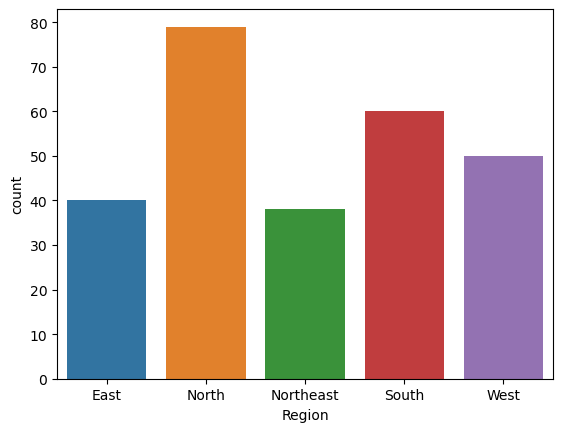

In [21]:
sns.countplot(x=df['Region'])

In [22]:
data_stats = df[['Estimated unemployment rate', 'Estimated employed', 'Estimated labour participation rate']]
round(data_stats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Estimated unemployment rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated labour participation rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [23]:
region_stats = df.groupby(['Region'])[['Estimated unemployment rate', 'Estimated employed', 'Estimated labour participation rate']].mean().reset_index()
round(region_stats, 2)

,Region,Estimated unemployment rate,Estimated employed,Estimated labour participation rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


## Visualization


<AxesSubplot:>

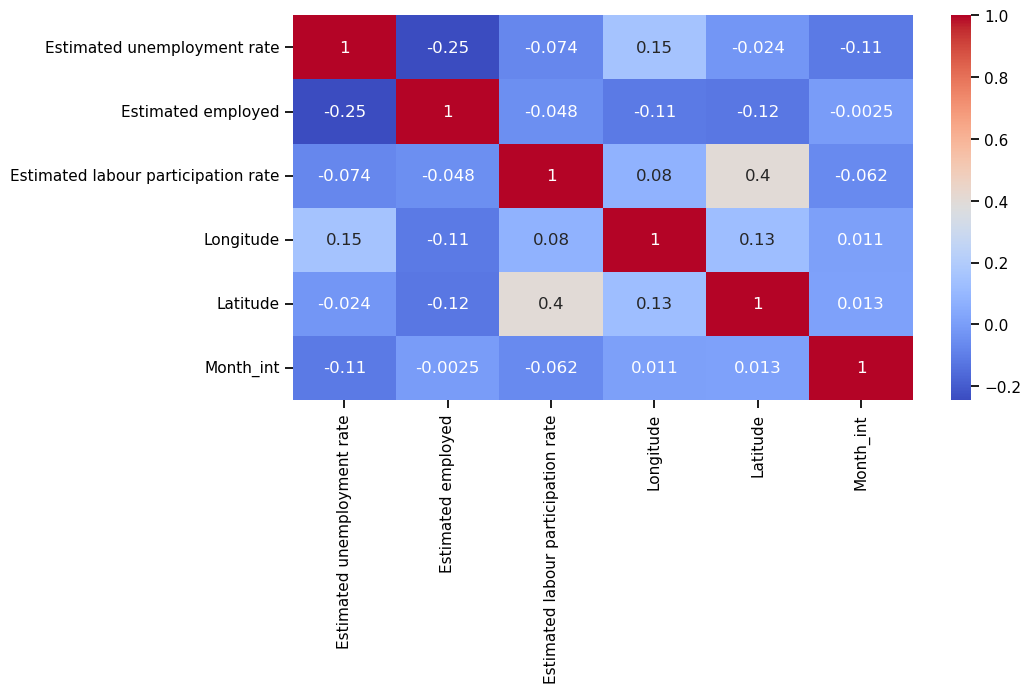

In [24]:
heat_maps = df[["Estimated unemployment rate", "Estimated employed","Estimated labour participation rate",'Longitude','Latitude','Month_int']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10,5))
sns.set_context("notebook",font_scale=1)
sns.heatmap(heat_maps,annot=True , cmap='coolwarm')

In [25]:
# Renaming columns for easier access
df1= df.rename(columns={ ' Estimated Unemployment Rate (%)' : 'est_unemp_perc', ' Estimated Employed' : 'est_emp',
                          ' Estimated Labour Participation Rate (%)' : 'est_labour_perc'}).reset_index(drop = True)

In [26]:
df1  

,State,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Region,Longitude,Latitude,month,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740,1,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740,2,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740,3,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740,4,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740,5,5,May
...,...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,6,6,Jun
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,7,7,Jul
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,8,8,Aug
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,9,9,Sep


In [27]:
df1.isna().sum()

State                                  0
Date                                   0
Frequency                              0
Estimated unemployment rate            0
Estimated employed                     0
Estimated labour participation rate    0
Region                                 0
Longitude                              0
Latitude                               0
month                                  0
Month_int                              0
Month_name                             0
dtype: int64